# Practice assignment

This notebooks reflects a possible solution for the practice. Hopefully this gives you full insight in what you have to do to do great at the graded assignment. The following steps are done:

1. Load and join data
2. Explore the data and see what valuable insights we can get
3. Train a model
4. Tune
5. Evaluate

To formulate a good business problem to create actionable insights for, we will first do the loading, joining and exploring before we choose what we want to train a model for. 

# load and join data
We've got multiple files in the folder that we would like to analyze. First step is to load these. We do this through the pandas package. When we have loaded the data, it's split across the files, so to do analysis, we have to join these together. Every file has the `BGGId` column. This is an id column that we can use to join the different dataframes together. 

In [187]:
import os
for dirname, _, filenames in os.walk('./data/'):
    for filename in filenames:
        if filename.endswith('.csv'):
            print(os.path.join(dirname, filename))

./data/subcategories.csv
./data/games.csv
./data/publishers_reduced.csv
./data/user_ratings.csv
./data/artists_reduced.csv


In [188]:
import pandas as pd
user_ratings=pd.read_csv('./data/user_ratings.csv')
sub_ctg=pd.read_csv('./data/subcategories.csv')
artist=pd.read_csv('./data/artists_reduced.csv')
publisher=pd.read_csv('./data/publishers_reduced.csv')
game_df=pd.read_csv('./data/games.csv')

user_ratings.head()

,BGGId,Rating,Username
0,213788,8.0,Tonydorrf
1,213788,8.0,tachyon14k
2,213788,8.0,Ungotter
3,213788,8.0,brainlocki3
4,213788,8.0,PPMP


The artist file has limited amount of ID's linked to the actual game Id's and therefore not used in the feature creation

In [189]:
# order columns on the id column
user_ratings.sort_values(by=['BGGId'])
#artist=artist.sort_values(by=['BGGId'])
publisher=publisher.sort_values(by=['BGGId'])
game_df=game_df.sort_values(by=['BGGId'])
sub_ctg=sub_ctg.sort_values(by=['BGGId'])
# set index to the id column
#artist=artist.set_index('BGGId')
publisher=publisher.set_index('BGGId')
game_df=game_df.set_index('BGGId')
sub_ctg=sub_ctg.set_index('BGGId')

In [190]:
features = publisher.join(sub_ctg, on='BGGId')
features = features.join(game_df, on='BGGId')
#features = features.join(artist, on='BGGId')
features

,Hans im Glück,Moskito Spiele,Portal Games,Spielworxx,Stronghold Games,"Valley Games, Inc.",YOKA Games,sternenschimmermeer,E.S. Lowe,Milton Bradley,...,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
BGGId,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,0,0,...,21926,21926,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,1,...,21926,21926,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,21926,21926,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,21926,21926,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,21926,21926,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347146,0,0,0,0,0,0,0,0,0,0,...,21926,21926,0,0,0,0,0,0,0,0
347521,0,0,0,0,0,0,0,0,0,0,...,21926,21926,0,0,0,0,0,0,0,0
348955,0,0,0,0,0,0,0,0,0,0,...,21926,21926,0,0,0,0,0,0,0,0


create the target by taking the average rating per Game ID (BGGId column). create the feature dataframe by concatting the feature files together. For easy visualisation, we add the target and feature together into a 'complete' dataframe (full_df)

In [191]:
target=user_ratings.groupby("BGGId")['Rating'].mean()
target=pd.DataFrame(target.reset_index())

#target=target.drop(['BGGId'], axis=1)
features=pd.concat([game_df,publisher,artist,sub_ctg],axis=1)
features = features[features['BGGId'].notna()]
features['BGGId'] = features['BGGId'].astype('int64')
# full_df = target.join(features, how='inner', on='BGGId', lsuffix='left', rsuffix='right')
full_df = pd.merge(target, features, how='inner', on='BGGId')
full_df = full_df.dropna()
full_df

,BGGId,Rating,Name,Description,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,...,Exploration,Miniatures,Territory Building,Card Game,Educational,Puzzle,Collectible Components,Word Game,Print & Play,Electronic
1,2,6.642697,Die Macher,die macher game seven sequential political rac...,1986.0,4.3206,7.61428,7.10363,1.57979,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,6.599476,Samurai,samurai set medieval japan player compete gain...,1998.0,2.4859,7.45601,7.23994,1.18227,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,6.553704,Acquire,acquire player strategically invest business t...,1964.0,2.5031,7.33861,7.14189,1.33583,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10,6.696101,El Caballero,refer sequel el grande el caballero share aspe...,1998.0,3.1824,6.45265,5.92290,1.43335,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,11,7.102735,Elfenland,elfenland redesign original white wind game el...,1998.0,2.1578,6.69695,6.47733,1.25365,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21861,341009,6.086533,Three Musketeers,musketeer publish sid sacksonacute gamut games...,1969.0,2.0000,5.97825,5.51065,1.33156,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21882,342010,7.022265,Blue Moon City,blue moon city board game pick twoplayer g...,2006.0,2.2960,7.03864,6.75450,1.20934,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21892,342638,7.684400,Augsburg 1520,aleathe game jakob fugger probably wealthy man...,2006.0,2.6708,6.42774,5.89930,1.26204,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21915,345976,9.458333,Le Vol de l'Aigle,le vol de lrsquoaigle flight eagle game simu...,2005.0,2.9231,7.66304,5.55178,1.19353,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### barchart of categories games in the dataset

<Axes: xlabel='Value', ylabel='count'>

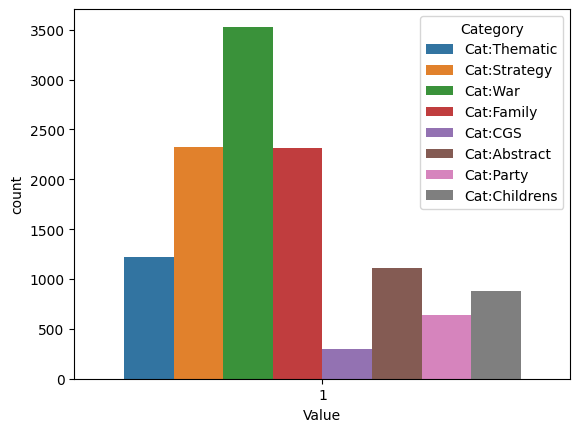

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

game_df = game_df.reset_index()

game_categories_long = pd.melt(game_df, id_vars=['BGGId'], value_vars=['Cat:Thematic', 'Cat:Strategy', 'Cat:War', 'Cat:Family', 'Cat:CGS', 'Cat:Abstract', 'Cat:Party', 'Cat:Childrens'],
                var_name='Category', value_name='Value')
game_categories_long = game_categories_long[game_categories_long['Value']!= 0]
sns.countplot(x='Value', hue='Category', data=game_categories_long)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Card Game'),
  Text(1, 0, 'Collectible Components'),
  Text(2, 0, 'Educational'),
  Text(3, 0, 'Electronic'),
  Text(4, 0, 'Exploration'),
  Text(5, 0, 'Miniatures'),
  Text(6, 0, 'Print & Play'),
  Text(7, 0, 'Puzzle'),
  Text(8, 0, 'Territory Building'),
  Text(9, 0, 'Word Game')])

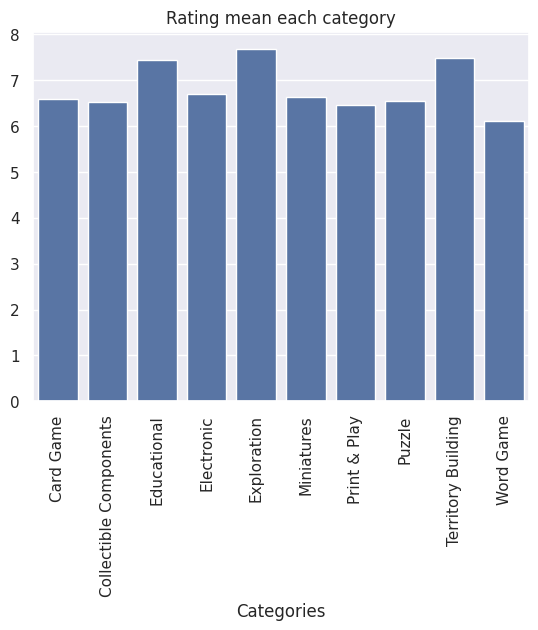

In [198]:
sub_ctg=pd.DataFrame({"ctg":['Exploration', 'Miniatures', 'Territory Building', 'Card Game','Educational', 'Puzzle', 'Collectible Components', 'Word Game','Print & Play', 'Electronic']})
sub_ctg=pd.concat([sub_ctg,target],axis=1)
sub_ctg.head()
sns.set_theme()
series = sub_ctg.groupby(['ctg']).Rating.mean()
sns.barplot(x = series.index, y = series.values)
plt.title('Rating mean each category')
plt.xlabel('Categories')
plt.xticks(rotation=90)

#### best average score of artist 

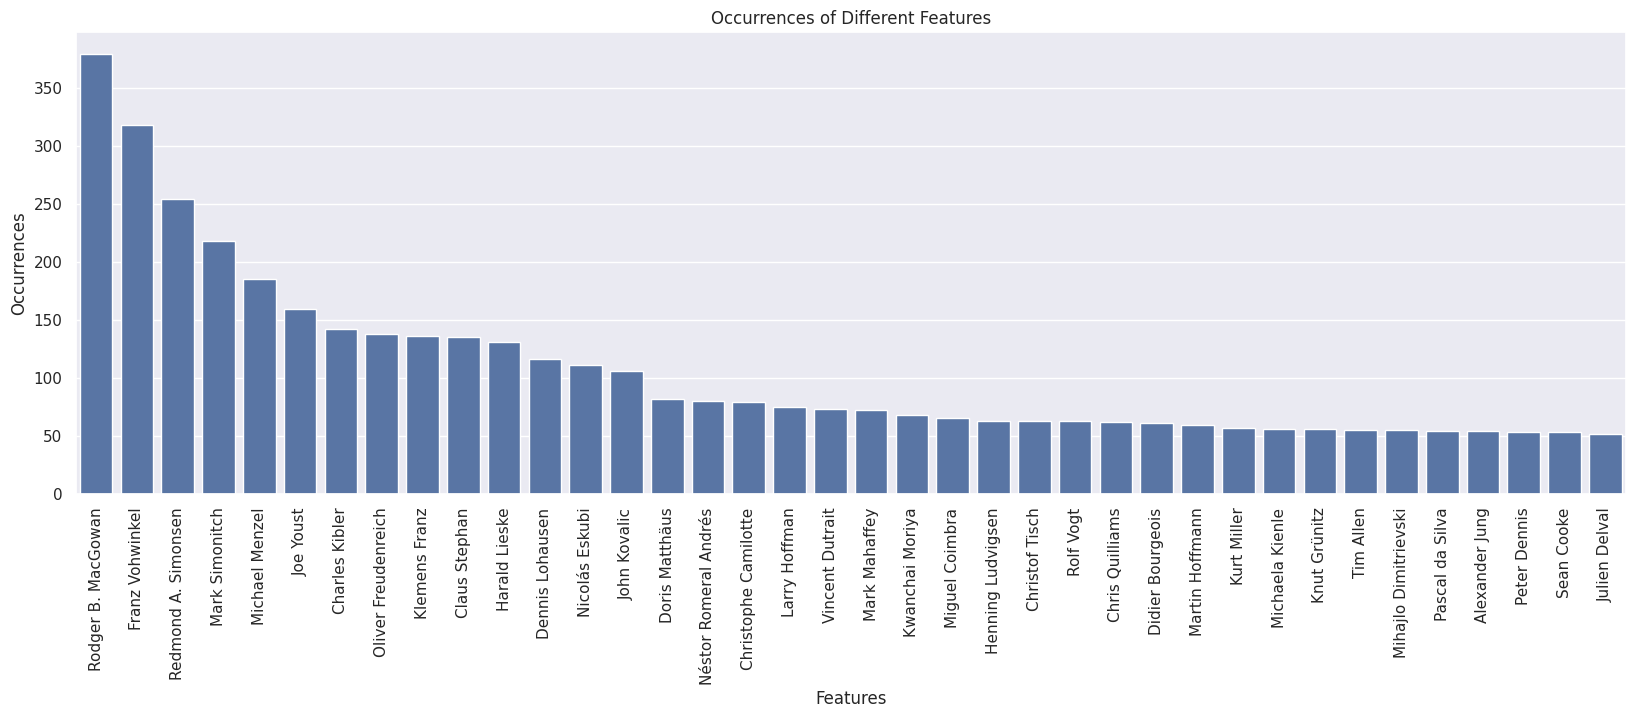

In [203]:
artist_sums_df =artist.sum().sort_values(ascending=False)
artist_sums_df = artist_sums_df.drop(['BGGId', 'Low-Exp Artist','(Uncredited)'])
artist_sums_df = artist_sums_df[artist_sums_df > 50]
plt.figure(figsize=(20, 6))
sns.barplot(artist_sums_df,)
#artist_sums_df.plot(kind='bar', color='skyblue')
plt.title('Occurrences of Different Features')
plt.xlabel('Features')
plt.ylabel('Occurrences')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.show()

#### line chart of the average score per year per category 

<Axes: xlabel='YearPublished', ylabel='Rating'>

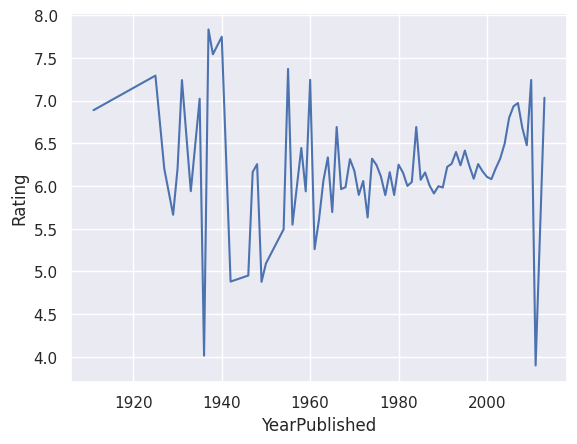

In [219]:
full_df['YearPublished'] = full_df['YearPublished'].astype('int64')
year_score = full_df.groupby(['YearPublished']).Rating.mean()

year_score = year_score[year_score.index > 1900]
sns.lineplot(year_score)

# Modeling

cleaning the full df with dropping columns that have direct connection with the score and only have textual features like description. Lastly clean the feature's columns from certain characters that create errors in the xgboost model. 

In [246]:
import re #column renaming for XGB

model_target = full_df['Rating'].reset_index().drop('index',axis=1)
model_features = full_df.drop(['BGGId', 'Rating', 'Name', 'Description', 'GameWeight','NumWeightVotes','AvgRating', 'BayesAvgRating', 'StdDev', 'ComAgeRec', 'LanguageEase', 'BestPlayers', 'GoodPlayers', 'NumOwned', 'NumWant', 'NumWish', 'MfgPlaytime', 'ComMinPlaytime', 'ComMaxPlaytime', 'MfgAgeRec', 'NumUserRatings', 'NumComments', 'NumAlternates', 'NumExpansions', 'NumImplementations', 'IsReimplementation', 'Family', 'Kickstarted', 'ImagePath', 'Rank:boardgame', 'Rank:strategygames', 'Rank:abstracts', 'Rank:familygames', 'Rank:thematic', 'Rank:cgs', 'Rank:wargames', 'Rank:partygames', 'Rank:childrensgames', 'Cat:Thematic', 'Cat:Strategy', 'Cat:War', 'Cat:Family', 'Cat:CGS', 'Cat:Abstract', 'Cat:Party', 'Cat:Childrens'], axis=1)

regex = r"[!\"#$%&'()*+,\-.\/:;<=>?@[\\\]^_`{|}~ ]+"
model_features.columns = model_features.columns.str.replace(regex, '_', regex=True)

model_target


,Rating
0,6.642697
1,6.599476
2,6.553704
3,6.696101
4,7.102735
...,...
1481,6.086533
1482,7.022265
1483,7.684400
1484,9.458333


Create the train/test splits

In [247]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(model_features,model_target,test_size=0.05,shuffle=False)


# create model
first create a baseline model with a simple linear regression. For easy evaluation, we define a function that calculates the mean absolute/squared error. 

In [232]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def acc_eval(model, X_test, y_test):
    preds = model.predict(X_test)
    mae = mean_absolute_error(preds,y_test)
    mse = mean_squared_error(preds,y_test)
    return {'mae': mae, 'mse': mse}

In [233]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
score = acc_eval(lin_model, X_test, y_test)
score

{'mae': 65372514.67524779, 'mse': 2.3762191063637676e+16}

Linear regression has a high error rate. Let's do a out of the box xgboost

In [250]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
clf = xgb.XGBRegressor( early_stopping_rounds=25)

clf.fit(X_train, y_train, eval_set=[(X_test, y_test)])
score = acc_eval(clf, X_test, y_test)
score

[0]	validation_0-rmse:1.30142
[1]	validation_0-rmse:1.25931
[2]	validation_0-rmse:1.25254
[3]	validation_0-rmse:1.25371
[4]	validation_0-rmse:1.22558
[5]	validation_0-rmse:1.22313
[6]	validation_0-rmse:1.21051
[7]	validation_0-rmse:1.21002
[8]	validation_0-rmse:1.18450
[9]	validation_0-rmse:1.17480
[10]	validation_0-rmse:1.17623
[11]	validation_0-rmse:1.17850
[12]	validation_0-rmse:1.17730
[13]	validation_0-rmse:1.17926
[14]	validation_0-rmse:1.17935
[15]	validation_0-rmse:1.17080
[16]	validation_0-rmse:1.17124
[17]	validation_0-rmse:1.16487
[18]	validation_0-rmse:1.16872
[19]	validation_0-rmse:1.16903
[20]	validation_0-rmse:1.16935
[21]	validation_0-rmse:1.16520
[22]	validation_0-rmse:1.16369
[23]	validation_0-rmse:1.16138
[24]	validation_0-rmse:1.16055
[25]	validation_0-rmse:1.16542
[26]	validation_0-rmse:1.16626
[27]	validation_0-rmse:1.16819
[28]	validation_0-rmse:1.16871
[29]	validation_0-rmse:1.16957
[30]	validation_0-rmse:1.16712
[31]	validation_0-rmse:1.16499
[32]	validation_0-

{'mae': 0.8960358557022369, 'mse': 1.346879157836503}

A lot lower! 